In [28]:
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
! ll

/usr/bin/sh: ll: command not found


In [3]:
!ls

dask-worker-space  PASTAPURCHASE_EDITED.csv  Practice_Quizz_Module_1.ipynb


In [4]:
df = pd.read_csv("PASTAPURCHASE_EDITED.csv")

In [5]:
df.info()

To request implementation, send an email to feature_requests@modin.org.


<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HHID    40000 non-null  int64  
 1   TIME    40000 non-null  int64  
 2   PASTA   40000 non-null  float64
 3   EXPOS   40000 non-null  int64  
 4   AGE     40000 non-null  float64
 5   INCOME  40000 non-null  float64
 6   AREA    40000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.1 MB


In [6]:
df.head()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3


In [7]:
df['TIME'].drop_duplicates()

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: TIME, dtype: int64

# 1. What is the correct mean and standard deviation of the quantity of pasta purchased by time unit by household?

In [8]:
# 平均数 
avg = np.mean(df['PASTA'])
# 标准差
std = np.std(df["PASTA"])

print("mean : {}\nstandard deviation: {}".format(avg, std))

mean : 1.8415445385441294
standard deviation: 1.0258982303367858


In [9]:
type(avg)

numpy.float64

In [10]:
df['AREA'].drop_duplicates()

0      3
40     4
60     1
80     5
180    2
Name: AREA, dtype: int64

# 2.In which area are located (i) the poorest household and (ii) the wealthiest household?

In [87]:
# 家庭经济情况
poor_home = df.groupby("AREA")["INCOME"].agg(np.min).sort_values()
rich_home =  df.groupby("AREA")["INCOME"].agg(np.max).sort_values(ascending=False)
print("poorest:{}\nwealthiest:{}".format(poor_home, rich_home))

poorest:AREA
2     609.107170
4    1241.960729
5    1331.260222
3    2353.176959
1    2740.776521
Name: INCOME, dtype: float64
wealthiest:AREA
5    141066.966883
4    112983.969631
3    111295.840727
2    106319.106367
1     85241.329860
Name: INCOME, dtype: float64


# 3. What is the maximum pasta quantity a household has bought over the whole time period? (Sum the quantity of pasta by household over time and indicate the maximum)

In [12]:
# 一个家庭一段时间内购买面粉的最大量
quantity  = df[['HHID', 'PASTA']].groupby('HHID').agg(np.sum).sort_values(by="PASTA", ascending=False)
quantity

,PASTA
HHID,
1493,55.361931
1511,51.030304
151,50.816654
647,50.771865
916,50.502666
...,...
92,23.926629
267,23.380097
572,23.225390


# 4.What is the average income of households living in area 4?

In [13]:
# 区域4中家庭的平均收入
income_by_area = df.groupby("AREA")["INCOME"].agg(np.mean).sort_values(ascending=False)
income_by_area

AREA
4    29260.133137
1    28076.599968
2    26218.857948
5    26030.910606
3    25879.485698
Name: INCOME, dtype: float64

# 5.How many households live in area 2, earn more than 20k, and have purchased more than 30 units of pasta over the whole time period?

In [14]:
# 在区域2中，有多少个家庭收入2w以上并且购买了30单位以上的面粉
area2 = df[df["AREA"] == 2]

income = area2[area2['INCOME'] >= 20000]

pasta = income.groupby('HHID').agg(np.sum)

res = len(pasta[pasta['PASTA'] >= 30])

res

218

# 6.What is the correlation between the purchases of pasta and the exposures?

In [15]:
# expos和购买量的相关系数
expos_pur = df.loc[:, ["PASTA", "EXPOS"]]

cor_matrix = np.corrcoef(expos_pur)

cor_matrix

array([[ 1., -1., -1., ..., -1., -1., -1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [-1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.]])

In [16]:
expos_pur.corr()

,PASTA,EXPOS
PASTA,1.000000,0.326617
EXPOS,0.326617,1.000000


In [17]:
cor_val = np.cov(expos_pur['PASTA'], expos_pur['EXPOS'])
cor_val
# np的cov和corrcoef不明白

array([[1.05249349, 0.23524015],
       [0.23524015, 0.49286151]])

# 7.Which of the following graphs reports the correct histogram by household of the total purchase of pasta made by the household over the whole period? (Sum the purchases by household and make a histogram.)

In [43]:
# 以下哪个图表正确反映了家庭在整个时间段内购买意大利面总量的柱状图?(把每个家庭购买的东西加起来，做成一个柱状图。)
quantity  = df[['HHID', 'PASTA']].groupby('HHID').agg(np.sum)
quantity.reset_index(inplace=True)
# quantity.plot.bar(x=quantity['HHID'], y=quantity['PASTA'])

In [56]:
quantity

,HHID,PASTA
0,1,42.524262
1,2,46.355283
2,3,37.507455
3,4,39.123709
4,5,41.318862
...,...,...
1995,1996,42.601586
1996,1997,39.881560
1997,1998,40.594879
1998,1999,38.499833


Text(0.5, 1.0, 'default')

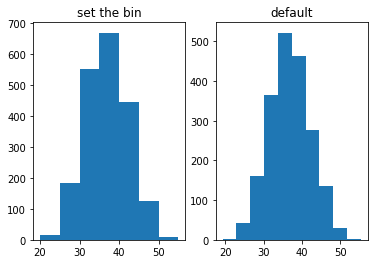

In [80]:
fig = plt.figure(12)
axes1 = fig.add_subplot(121)
axes1.hist( x=quantity['PASTA'], bins=[20, 25, 30, 35, 40, 45, 50, 55])
axes1.set_title("set the bin")

axes2 = fig.add_subplot(122)
axes2.hist(x=quantity['PASTA'])
axes2.set_title("default")

In [66]:
fig = go.Figure(go.Histogram(x=quantity['PASTA'], xbins={"start":20, "end":55, "size":5}))
fig.show()
# https://www.jianshu.com/p/4f4daf47cc85 plotly参数详解

In [32]:
df.head()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3


# 8.Which of the following graphs reports the correct time series of the overall total purchase of pasta? (Sum the purchases by time units and plot the quantity by time unit.)

In [95]:
# 与正确答案的图形不一样，不知道为什么
t_q = df[['TIME', 'PASTA']].groupby("TIME").agg(np.sum)

t_q.reset_index(inplace=True)

fig = go.Figure(go.Scatter(x=t_q['TIME'], y=t_q['PASTA'], mode='markers'))
fig.update_layout(width=600)
fig.show()

In [101]:
t_q

,TIME,PASTA
0,1,3705.741158
1,2,3599.028148
2,3,3699.517762
3,4,3612.204636
4,5,3760.695910
5,6,3668.275370
6,7,3702.510261
7,8,3677.773211
8,9,3648.582796
9,10,3728.283701
